In [1]:
from skimage import io
import numpy as np 
import pandas as pd 
from PIL import Image
from tqdm.notebook import tqdm
import time
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow import keras as kr
import tensorflow as tf

In [2]:

df = pd.read_csv("../input/plant-pathology-2020-fgvc7/train.csv")


Oryginalne obrazy są dużej wielkości, dlatego pomniejszam je do kwadratów o boku 224. Przyspieszy to trening i potencjalnie zmniejszy overfitting. 

In [3]:
imagesDataLen=len(df)
SIZE = 224
imagesData = []
for i in tqdm(range(imagesDataLen)):
  imagesData.append( np.asarray(Image.open
                                ('../input/plant-pathology-2020-fgvc7/images/Train_'+str(i)+'.jpg').convert('RGB').resize((SIZE, SIZE))) )

imagesData=np.asarray(imagesData)

  0%|          | 0/1821 [00:00<?, ?it/s]

In [4]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split( imagesData, df.loc[:, df.columns != 'image_id'].to_numpy(), test_size=0.3, random_state=42)

[1 0 0 0]


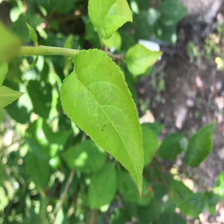

In [5]:
from PIL import Image
import numpy as np

img = Image.fromarray(trainX[23],'RGB')
print( trainY[23])
img


[0 0 0 1]


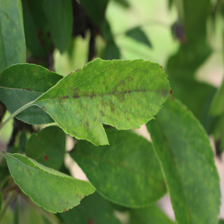

In [6]:


img = Image.fromarray(testX[24], 'RGB')
print( testY[24])
img

In [7]:
trainX=trainX/255.0
testX=testX/255.0

In [8]:
print(trainX[0])
print(trainY[0])

print(testX[0])
print(testY[0])

[[[0.24705882 0.4        0.24705882]
  [0.23137255 0.38823529 0.23529412]
  [0.23529412 0.38039216 0.22745098]
  ...
  [0.42352941 0.58431373 0.51372549]
  [0.40392157 0.56862745 0.50196078]
  [0.4        0.56470588 0.51372549]]

 [[0.24313725 0.38823529 0.23921569]
  [0.22745098 0.38823529 0.23529412]
  [0.21960784 0.38039216 0.22352941]
  ...
  [0.39607843 0.56862745 0.49411765]
  [0.39607843 0.58039216 0.49803922]
  [0.40392157 0.56470588 0.50588235]]

 [[0.22745098 0.39215686 0.22745098]
  [0.21568627 0.38823529 0.21960784]
  [0.20392157 0.37647059 0.21176471]
  ...
  [0.40392157 0.58823529 0.50588235]
  [0.38039216 0.56862745 0.48235294]
  [0.41960784 0.58039216 0.51372549]]

 ...

 [[0.28627451 0.45098039 0.2627451 ]
  [0.26666667 0.45490196 0.25490196]
  [0.25882353 0.45098039 0.24313725]
  ...
  [0.27843137 0.44313725 0.27058824]
  [0.41176471 0.57254902 0.34509804]
  [0.48235294 0.63921569 0.44705882]]

 [[0.28627451 0.45490196 0.26666667]
  [0.2745098  0.45098039 0.25882353]


In [9]:


print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))

print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
start = time.time()



regVal=0.001

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(trainX.shape[1:]), kernel_regularizer=kr.regularizers.l2(regVal)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=kr.regularizers.l2(regVal)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=kr.regularizers.l2(regVal)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=kr.regularizers.l2(regVal)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=kr.regularizers.l2(regVal)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))



model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=kr.regularizers.l2(regVal)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu', kernel_regularizer=kr.regularizers.l2(regVal)))
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.3))
model.add(layers.Dense(4, activation='softmax' ))

model.summary()


start = time.time()
es =kr.callbacks. EarlyStopping(monitor='val_loss', mode='min', patience=5)
model.compile(optimizer=kr.optimizers.Adam(),
               loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(trainX,trainY, epochs=40,validation_data=(testX, testY),callbacks=[])




end = time.time()
print("time")
print(end - start)

Train: X=(1274, 224, 224, 3), y=(1274, 4)
Test: X=(547, 224, 224, 3), y=(547, 4)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________

18/18 - 2s - loss: 1.9124 - accuracy: 0.7587


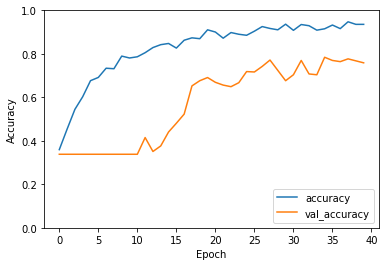

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

W poprawieniu modelu pomóc mógłby generator danych. Pomóc mogłoby też usunięcie tła, a w tym specyficzny przypadku, przekształcenie pojedynczego zdjęcia liści na zbiór zdjęć z pojedynczymi ogniskami choroby.